<a href="https://colab.research.google.com/github/Benjamin-Lea/MachineLearing_FinalProject/blob/main/DataSec_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENG 4610 – Applications of Machine Learning to Software Engineering**
# **Final Project : Machine-Learning Based Cyber Security**
# Training File
Athours: Sam Elgert, Ben Lea



In [ ]:
# Dependacies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import classification_report
%load_ext tensorboard
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import joblib
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
np.random.seed(40)

## Data
- Get the data
- Process the data
- split the training & testing data

In [ ]:
# Get the data #
Data = pd.read_csv("SENG 4610 Training Data.csv")



# X Data - Drop the unesessary columns
DataX = Data.drop(['id', 'attack_cat', 'label'], axis=1)
ordinal_encoder = OrdinalEncoder()
DataX = ordinal_encoder.fit_transform(DataX)
DataX = pd.DataFrame(DataX)
# Replace any strings with integers.


# Data Normalization -- Scale the features to be between 0 an 1.
x = DataX.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range= (0,1))
x_scaled = min_max_scaler.fit_transform(x)
DataX_Normalized = pd.DataFrame(x_scaled)


# Y Data - Labels
DataY_Binary = Data.iloc[: , -1:] # Has normal and attack
DataY_Classifier = Data.iloc[: , -2:-1] # All the classes associated with the attacks
DataY_Classes_withNames = DataY_Classifier;
x = np.array([0,1])

# Replace strings with ints for the labels
DataY_Classifier = DataY_Classifier.replace('Normal', int(0))
DataY_Classifier = DataY_Classifier.replace('Analysis', int(1))
DataY_Classifier = DataY_Classifier.replace('Backdoor', int(2))
DataY_Classifier = DataY_Classifier.replace('DoS', int(3))
DataY_Classifier = DataY_Classifier.replace('Exploits', int(4))
DataY_Classifier = DataY_Classifier.replace('Generic', int(5))
DataY_Classifier = DataY_Classifier.replace('Reconnaissance', int(6))
DataY_Classifier = DataY_Classifier.replace('Shellcode', int(7))
DataY_Classifier = DataY_Classifier.replace('Worms', int(8))
DataY_Classifier = DataY_Classifier.replace('Fuzzers', int(9))
DataY_Classifier_Labels = ['Normal', 'Analysis', 'Backdoor', 'DoS', 'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms', 'Fuzzers']
num_of_classess = 10

DataX_Normalized = np.array(DataX_Normalized)
DataY_Classifier = np.array(DataY_Classifier)
# Split Training and Testing Data 75% 25%
# By Defualt the train_test_split keeps the same percentage of each class as the total.
X_train, X_test, y_train, y_test = train_test_split(DataX_Normalized, DataY_Classifier,test_size=0.25, shuffle= True, stratify = DataY_Classifier)

# dimensionality reduction
Thorugh our testing we found no improments by reducing the dimentionality.


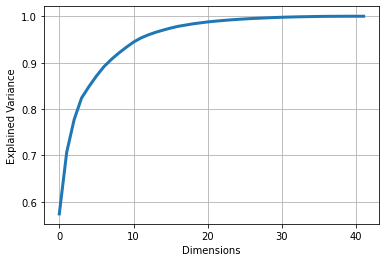

In [ ]:
# Demensionality Reduction
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(DataX_Normalized)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
## Demensionality Reduction - Uncomment to reduce dementionality

# pca = PCA(n_components=15) # 15 dimensional PCA
# pca.fit(DataX)
# DataX_pca = pca.transform(DataX)
# X_train, X_test, y_train, y_test = train_test_split(DataX_pca, DataY_Classifier,test_size=0.25)

# Visualize the Data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f845dfaca10>],
      dtype=object)

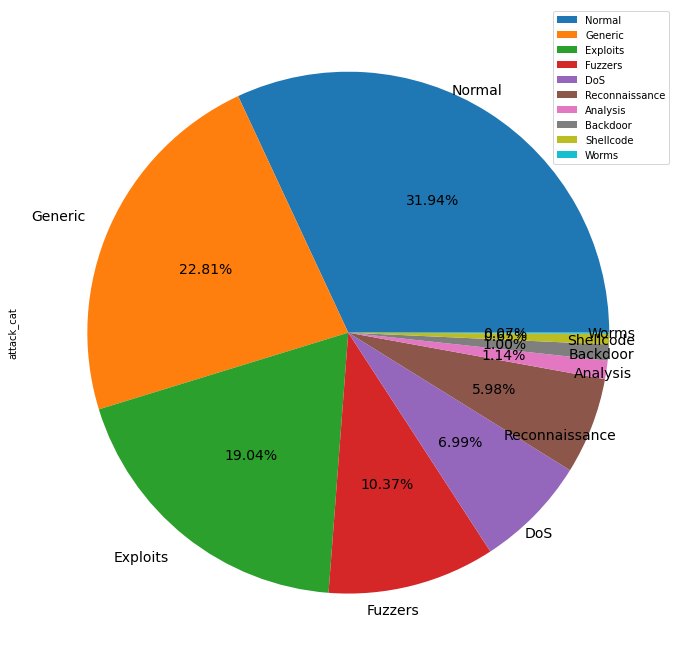

In [ ]:
DataY_Classes_withNames.apply(pd.value_counts).plot.pie(subplots=True, figsize=(12, 12),center =(-10,-10), autopct='%0.2f%%',  textprops={'fontsize': 14})

# Random Guess Baseline Algorithm
Algorithm that guess the attack based on how frequently they occur.

In [ ]:
import random
y_predict_rand = np.array([])
for y in range(len(DataY_Classifier)):
  randomNum = random.random() * 100
  if(randomNum <= 31.94):
    y_predict_rand = np.append(y_predict_rand, 0)
  elif(randomNum > 31.94 and randomNum <= (31.94 + 22.81)):
      y_predict_rand = np.append(y_predict_rand, 5)
  elif(randomNum >(31.94 + 22.81) and randomNum <= (31.94 + 22.81 + 19.04)):
      y_predict_rand = np.append(y_predict_rand, 4)
  elif(randomNum > (31.94 + 22.81 + 19.04) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37)):
     y_predict_rand = np.append(y_predict_rand, 9)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37 + 6.99)):
      y_predict_rand = np.append(y_predict_rand, 3)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37 + 6.99) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98)):
    y_predict_rand = np.append(y_predict_rand, 1)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14)):
      y_predict_rand = np.append(y_predict_rand, 1)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14 + 1)):
      y_predict_rand = np.append(y_predict_rand, 2)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14 + 1) and randomNum <= (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14 + 1 + 0.65)):
      y_predict_rand = np.append(y_predict_rand, 7)
  elif(randomNum > (31.94 + 22.81 + 19.04 + 10.37 + 6.99 + 5.98 + 1.14 + 1 + 0.65) and randomNum <= (100)):
      y_predict_rand = np.append(y_predict_rand, 8)
  else:
    y_predict_rand = np.append(y_predict_rand, 0)

confusion_Rand = tf.math.confusion_matrix(
              labels = DataY_Classifier,   # get trule labels
              predictions = y_predict_rand,  # get predicted labels
              num_classes=num_of_classess)
print(confusion_Rand)
print(classification_report(DataY_Classifier, y_predict_rand, target_names=DataY_Classifier_Labels))

tf.Tensor(
[[17891  3956   591  3953 10701 12637     0   357    41  5873]
 [  641   134    27   124   397   463     0    12     0   202]
 [  516   121    15   125   328   439     0    15     1   186]
 [ 3860   910   102   827  2346  2859     0    67    12  1281]
 [10692  2359   321  2232  6354  7704     0   217    18  3496]
 [12690  2870   409  2814  7731  8966     0   293    30  4197]
 [ 3437   718    83   731  2008  2409     0    75     9  1021]
 [  359    69    13    80   203   279     0     9     0   121]
 [   36    11     2    12    31    24     0     1     0    13]
 [ 5822  1352   183  1287  3446  4108     0   129    12  1845]], shape=(10, 10), dtype=int32)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        Normal       0.32      0.32      0.32     56000
      Analysis       0.01      0.07      0.02      2000
      Backdoor       0.01      0.01      0.01      1746
           DoS       0.07      0.07      0.07     12264
      Exploits       0.19      0.19      0.19     33393
       Generic       0.22      0.22      0.22     40000
Reconnaissance       0.00      0.00      0.00     10491
     Shellcode       0.01      0.01      0.01      1133
         Worms       0.00      0.00      0.00       130
       Fuzzers       0.10      0.10      0.10     18184

      accuracy                           0.21    175341
     macro avg       0.09      0.10      0.09    175341
  weighted avg       0.20      0.21      0.21    175341



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Deep Neural Network
In this approach we implement a DNN to determine the classes.

In [ ]:
# # Create the model
model = models.Sequential()
model.add(tf.keras.layers.Input(shape=(42,))) # Input
model.add(tf.keras.layers.Dense(38, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(35, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output Layer

In [ ]:
lss = loss=tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt, loss = lss, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1634      
                                                                 
 dropout (Dropout)           (None, 38)                0         
                                                                 
 dense_1 (Dense)             (None, 35)                1365      
                                                                 
 dense_2 (Dense)             (None, 30)                1080      
                                                                 
 dense_3 (Dense)             (None, 25)                775       
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 5,114
Trainable params: 5,114
Non-trainabl

In [ ]:
# Set a subdirectory name in log_dir directory based on current time
def make_logdir():
 import time
 return 'log_dir/log_' + time.strftime("%Y_%m_%d-%H_%M_%S")
run_logdir = make_logdir() # Get the subdirectory name
keras.backend.clear_session()
checkpoint_cb = keras.callbacks.ModelCheckpoint("DNN_Model.h5")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# Train the model
callback_ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history  = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[checkpoint_cb, tensorboard_cb, callback_ES])

# Random Forest Classifier


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
DoRandomizedSearch = False
if(DoRandomizedSearch):
  rf = RandomForestRegressor(random_state = 42)
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start =25, stop = 100, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 2, verbose=10, random_state=42, n_jobs = -1)
  # Fit the random search model
  rf_random.fit(X_train, y_train)
  rf_random.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=100, bootstrap = False)
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
print(classification_report( y_test, y_pred_rf, target_names=DataY_Classifier_Labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                precision    recall  f1-score   support

        Normal       0.95      0.93      0.94     14000
      Analysis       0.71      0.16      0.26       500
      Backdoor       0.76      0.13      0.22       437
           DoS       0.35      0.14      0.20      3066
      Exploits       0.63      0.90      0.74      8348
       Generic       1.00      0.98      0.99     10000
Reconnaissance       0.92      0.77      0.84      2623
     Shellcode       0.70      0.70      0.70       283
         Worms       0.22      0.06      0.10        33
       Fuzzers       0.76      0.76      0.76      4546

      accuracy                           0.83     43836
     macro avg       0.70      0.55      0.57     43836
  weighted avg       0.83      0.83      0.82     43836



# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Grid Search For Optimal Configuration ##
GridSearchDecicionTree = False
if(GridSearchDecicionTree):
  from sklearn.model_selection import GridSearchCV
  max_depth_range = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
  min_samples_leaf_range = [3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
  tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range},
                {'min_samples_leaf': min_samples_leaf_range}]
  grid_search_cv = GridSearchCV(DecisionTreeClassifier(), tree_param, verbose = 10)
  grid_search_cv.fit(X_train, y_train)
  grid_search_cv.best_estimator_

In [ ]:
# Train
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf = 4)
dt_clf.fit(X_train, y_train)
# Test
y_pred_DT = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred_DT, target_names=DataY_Classifier_Labels))

                precision    recall  f1-score   support

        Normal       0.92      0.92      0.92     14000
      Analysis       0.48      0.18      0.26       500
      Backdoor       0.66      0.12      0.20       437
           DoS       0.29      0.28      0.28      3066
      Exploits       0.64      0.77      0.70      8348
       Generic       0.99      0.98      0.99     10000
Reconnaissance       0.91      0.75      0.82      2623
     Shellcode       0.62      0.57      0.59       283
         Worms       0.42      0.30      0.35        33
       Fuzzers       0.75      0.67      0.71      4546

      accuracy                           0.81     43836
     macro avg       0.67      0.55      0.58     43836
  weighted avg       0.81      0.81      0.80     43836



# Voting

In [ ]:
def printResults(YPredict, YLabel, Title):
  print("\n\n########################################\t\n", Title ,"\n########################################");
  print(classification_report(YLabel, YPredict, target_names=DataY_Classifier_Labels))
  confusion = tf.math.confusion_matrix( labels = YLabel, predictions = YPredict, num_classes=10)
  print(confusion)

In [ ]:
# Get the probabilities of each classification
y_pred_dnn = model.predict(X_test)
y_pred_rf = np.array(rf_clf.predict_proba(X_test))
y_pred_dt = dt_clf.predict_proba(X_test)
y_pred_ensamble = y_pred_dnn + y_pred_rf + y_pred_dt

# Do the soft voting
# y_pred_ensamble = np.argmax(y_pred_ensamble, axis = 1)

printResults(np.argmax(y_pred_dnn, axis = 1), y_test, "DNN")
printResults(np.argmax(y_pred_dt, axis =1 ), y_test, "Decision Tree")
printResults(np.argmax(y_pred_rf, axis =1 ), y_test, "Random Forest")
printResults(np.argmax(y_pred_ensamble, axis =1 ), y_test, "Soft Voting Esamble")

In [ ]:
!pip install scikeras
from sklearn.ensemble import  VotingClassifier
from scikeras.wrappers import KerasClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ensemble

In [ ]:
#wrappedModel.fit(X_train, y_train)
wrappedModel.predict_proba(X_test)

685/685 [==============================] - 5s 7ms/step


array([[0.014, 0.046, 0.043, ..., 0.006, 0.001, 0.068],
       [0.347, 0.002, 0.001, ..., 0.002, 0.   , 0.386],
       [0.455, 0.001, 0.   , ..., 0.001, 0.   , 0.447],
       ...,
       [0.005, 0.039, 0.035, ..., 0.002, 0.   , 0.041],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.001, 0.008, 0.001, ..., 0.   , 0.   , 0.001]], dtype=float32)

In [ ]:
# model = KerasClassifier(model=create_model, epochs=150, batch_size=10, verbose=0)
# X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[checkpoint_cb, tensorboard_cb, callback_ES]
lss = loss=tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer= opt, loss = lss, metrics=['accuracy'])
keras.backend.clear_session()
wrappedModel = KerasClassifier(model = model, loss = lss, optimizer= opt, metrics=['accuracy'],
                               epochs = 5, batch_size = 64, verbose = 1, validation_split=0.1, callbacks=[checkpoint_cb, tensorboard_cb, callback_ES])
eclf = VotingClassifier(estimators=[('dnn', wrappedModel), ('rf', rf_clf), ('dt', dt_clf)], voting='soft')
eclf.fit(X_train, y_train)

In [ ]:
def createModel():
  # # Create the model
  model = models.Sequential()
  model.add(tf.keras.layers.Input(shape=(42,))) # Input
  model.add(tf.keras.layers.Dense(38, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(35, activation='relu'))
  model.add(tf.keras.layers.Dense(30, activation='relu'))
  model.add(tf.keras.layers.Dense(25, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output Layer
  lss = loss=tf.keras.losses.SparseCategoricalCrossentropy()
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer= opt, loss = lss, metrics=['accuracy'])
  model.class_weight = {0: weight_for_0, 1: weight_for_1}
  return model

In [ ]:
keras.backend.clear_session()
wrappedModel = KerasClassifier(build_fn = createModel,
                               epochs = 5, batch_size = 64, verbose = 1, validation_split=0.1, callbacks=[checkpoint_cb, tensorboard_cb, callback_ES])
wrappedModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/5
1850/1850 [==============================] - 21s 10ms/step - loss: 0.8194 - accuracy: 0.7044 - val_loss: 0.6649 - val_accuracy: 0.7524
Epoch 2/5
1850/1850 [==============================] - 24s 13ms/step - loss: 0.6491 - accuracy: 0.7566 - val_loss: 0.6039 - val_accuracy: 0.7688
Epoch 3/5
1850/1850 [==============================] - 24s 13ms/step - loss: 0.6041 - accuracy: 0.7698 - val_loss: 0.5680 - val_accuracy: 0.7822
Epoch 4/5
1850/1850 [==============================] - 30s 16ms/step - loss: 0.5820 - accuracy: 0.7769 - val_loss: 0.5511 - val_accuracy: 0.7855
Epoch 5/5
1850/1850 [==============================] - 20s 11ms/step - loss: 0.5689 - accuracy: 0.7803 - val_loss: 0.5412 - val_accuracy: 0.7887


KerasClassifier(
	model=None
	build_fn=<function createModel at 0x7f8453f51a70>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.ModelCheckpoint object at 0x7f8452f83f50>, <keras.callbacks.TensorBoard object at 0x7f8452f83390>, <keras.callbacks.EarlyStopping object at 0x7f8453a82d50>]
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=5
	class_weight=None
)

In [ ]:
keras.backend.clear_session()
wrappedModel = KerasClassifier(build_fn = createModel,
                               epochs = 5, batch_size = 64, verbose = 1, validation_split=0.1)
eclf = VotingClassifier(estimators=[('dnn', wrappedModel), ('rf', rf_clf), ('dt', dt_clf)], voting='soft')
eclf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/5
1850/1850 [==============================] - 23s 11ms/step - loss: 0.8118 - accuracy: 0.7026 - val_loss: 0.6632 - val_accuracy: 0.7464
Epoch 2/5
1850/1850 [==============================] - 31s 17ms/step - loss: 0.6362 - accuracy: 0.7616 - val_loss: 0.5881 - val_accuracy: 0.7755
Epoch 3/5
1850/1850 [==============================] - 22s 12ms/step - loss: 0.5890 - accuracy: 0.7745 - val_loss: 0.5692 - val_accuracy: 0.7795
Epoch 4/5
1850/1850 [==============================] - 26s 14ms/step - loss: 0.5691 - accuracy: 0.7801 - val_loss: 0.5478 - val_accuracy: 0.7846
Epoch 5/5
1850/1850 [==============================] - 16s 8ms/step - loss: 0.5584 - accuracy: 0.7832 - val_loss: 0.5322 - val_accuracy: 0.7900


VotingClassifier(estimators=[('dnn',
                              KerasClassifier(batch_size=64, build_fn=<function createModel at 0x7f8453f51a70>, epochs=5, validation_split=0.1)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=20,
                                                     min_samples_split=4)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=50,
                                                     min_samples_leaf=4))],
                 voting='soft')

In [ ]:
eclf_pred = eclf.predict(X_test)
printResults(eclf_pred, y_test, "ECLF")

685/685 [==============================] - 5s 7ms/step


########################################	
 ECLF 
########################################
                precision    recall  f1-score   support

        Normal       0.94      0.91      0.93     14000
      Analysis       0.66      0.13      0.21       500
      Backdoor       0.69      0.14      0.23       437
           DoS       0.35      0.11      0.17      3066
      Exploits       0.62      0.90      0.74      8348
       Generic       1.00      0.98      0.99     10000
Reconnaissance       0.90      0.76      0.82      2623
     Shellcode       0.63      0.66      0.64       283
         Worms       0.69      0.27      0.39        33
       Fuzzers       0.73      0.74      0.74      4546

      accuracy                           0.82     43836
     macro avg       0.72      0.56      0.59     43836
  weighted avg       0.82      0.82      0.81     43836

tf.Tensor(
[[12759    21     0     3   100     0    12    10     0

# Save Models to files


In [ ]:
# joblib.dump(dt_clf, "Models/DecisionTreeModel.pkl")
# joblib.dump(rf_clf, "Models/RandomForestModel.pkl")
# model.save("Models/DNNModel.h5")
joblib.dump(eclf, "Models/EnsembleModel.pkl")

['Models/EnsembleModel.pkl']